In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
shuffled_df = df.sample(n=len(df))

shuffled_df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [4]:
shuffled_df = shuffled_df.reset_index(drop=True)
shuffled_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
1,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
2,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
3,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
4,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
299,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
300,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
301,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [5]:
df=shuffled_df

In [6]:
class_counts = df['output'].value_counts()
class_counts

output
1    165
0    138
Name: count, dtype: int64

In [7]:
new_columns=['age', 'gender','cp',
             'trtbps','chol','fbs',
             'rest_ecg','thalach',
             'exng','oldpeak',
             'slope','ca',
             'thal','target']


In [8]:
df.columns=new_columns
df

,age,gender,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
0,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
1,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
2,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
3,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
4,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
299,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
300,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
301,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull()

,age,gender,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

age         0
gender      0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exng        0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
44    11
56    11
62    11
60    11
41    10
64    10
63     9
67     9
42     8
61     8
65     8
43     8
45     8
53     8
55     8
48     7
50     7
66     7
46     7
47     5
49     5
68     4
39     4
35     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
76     1
29     1
74     1
77     1
Name: count, dtype: int64

In [14]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [15]:
df["cp"].value_counts().count()

4

In [16]:
df["age"].value_counts().count()

41

In [17]:
numeric_var=[]
categoric_var=[]
for i in df.columns:
    if df[i].value_counts().count() <10:
        categoric_var.append(i)
    else:
        numeric_var.append(i)


In [18]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [19]:
categoric_var

['gender', 'cp', 'fbs', 'rest_ecg', 'exng', 'slope', 'ca', 'thal', 'target']

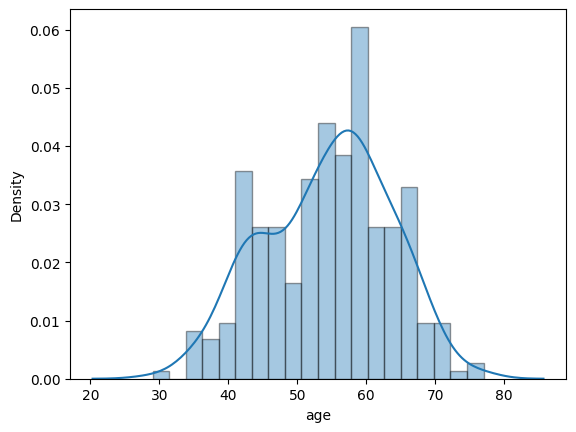

In [20]:
sns.distplot( df['age']  ,
               hist_kws=dict(linewidth=1,edgecolor='k') ,
             bins=20
           )
plt.show()

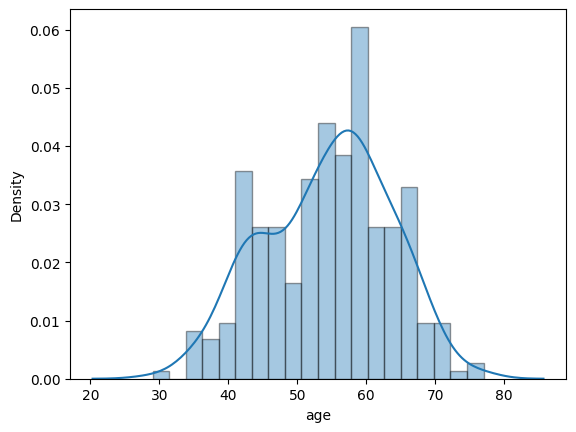

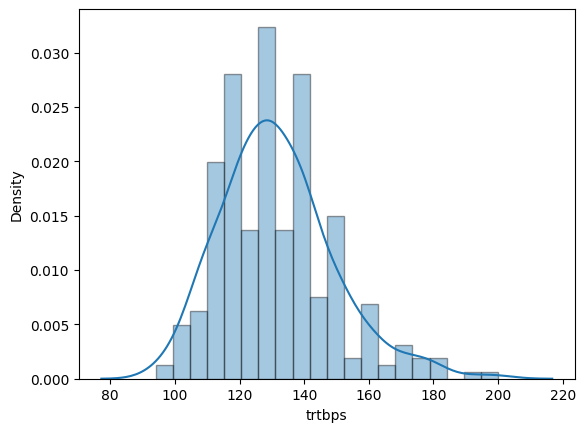

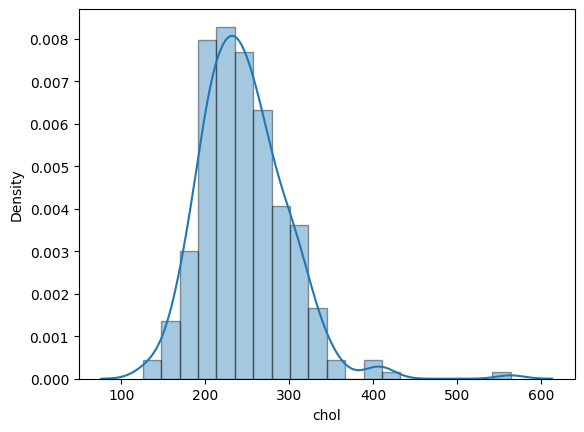

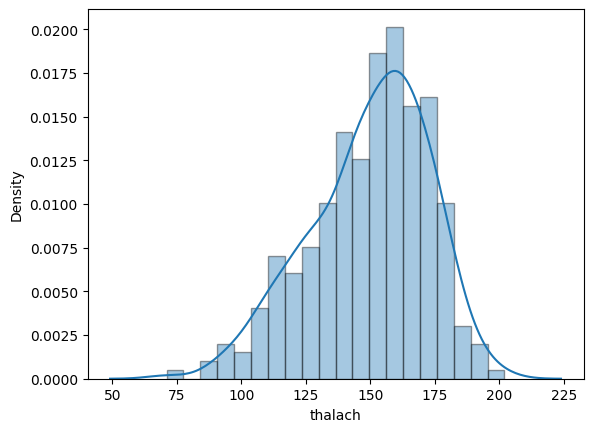

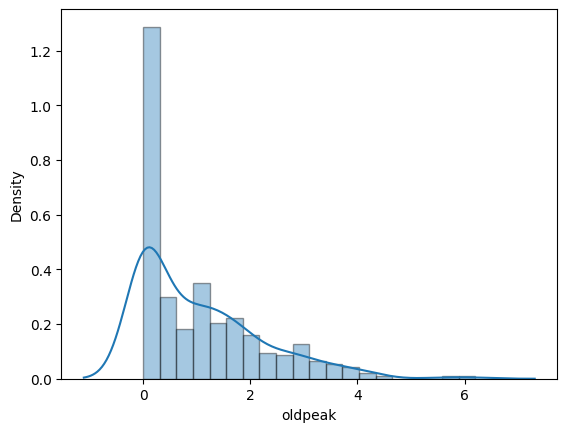

In [21]:
for i in numeric_var:
    sns.distplot( df[i]  ,
                   hist_kws=dict(linewidth=1,edgecolor='k') ,
                 bins=20
               )
    plt.show()

In [22]:

df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [23]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [24]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

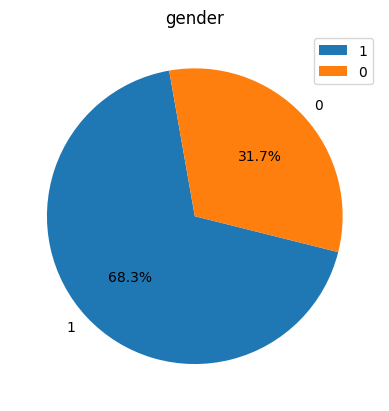

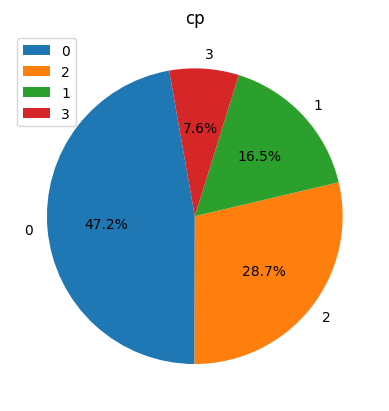

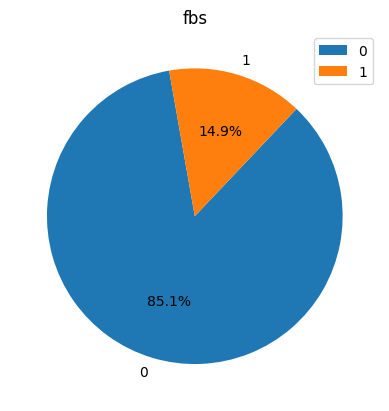

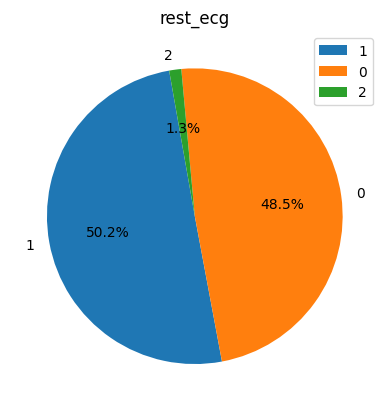

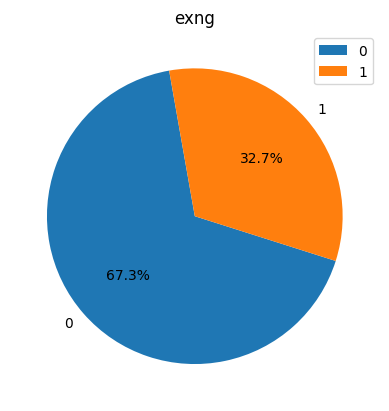

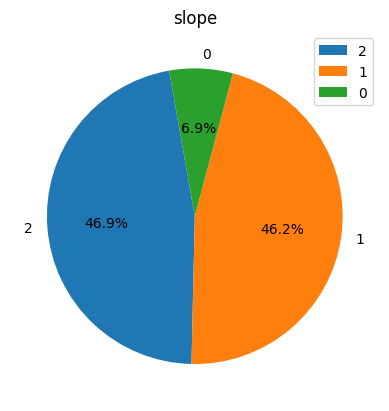

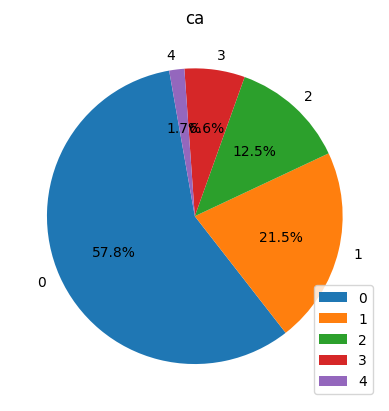

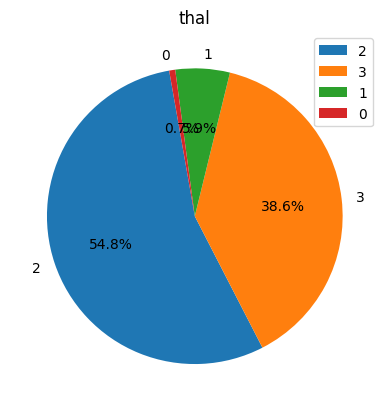

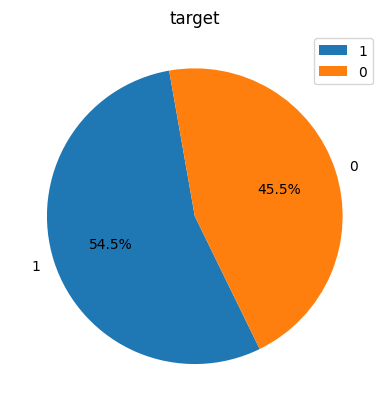

In [25]:
for i in categoric_var:
    observation_values=list(df[i].value_counts().index)
    total_observation_values=list(df[i].value_counts())
    plt.pie(total_observation_values,
    labels=observation_values,
    autopct='%1.1f%%',startangle=100,labeldistance=1.1)
    plt.title(i)
    plt.legend()
    plt.show()
    

In [26]:
df["thal"]==0

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: thal, Length: 303, dtype: bool

In [27]:
df[df["thal"]==0]

,age,gender,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
83,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
151,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [28]:
df["thal"]=df["thal"].replace(0,2)

In [29]:
df.loc[[119,294],:]

,age,gender,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
119,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
294,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


In [30]:
df["thal"].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

In [31]:
df["ca"]=df["ca"].replace(4,0)

In [32]:
df["ca"].value_counts()

ca
0    180
1     65
2     38
3     20
Name: count, dtype: int64

In [33]:
numeric_var.append("target")
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

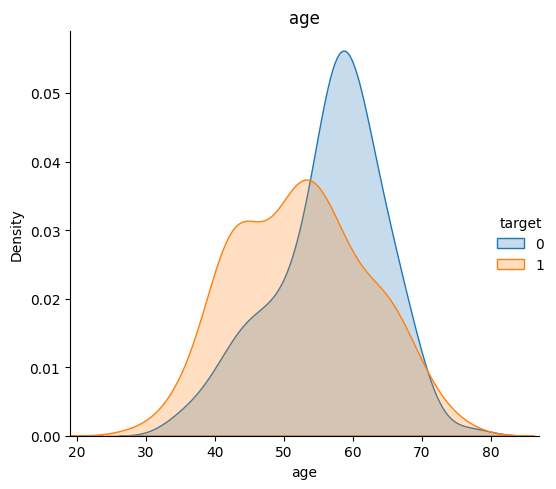

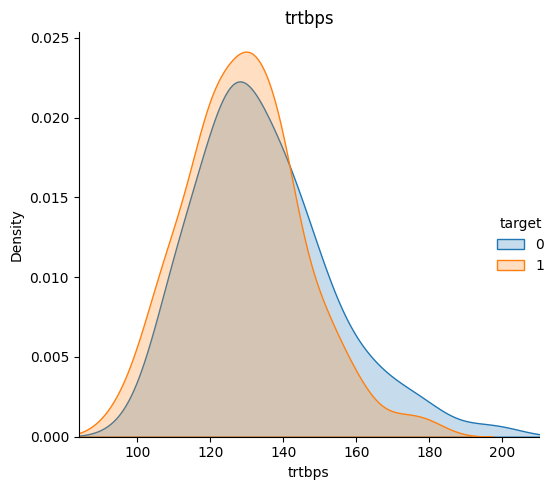

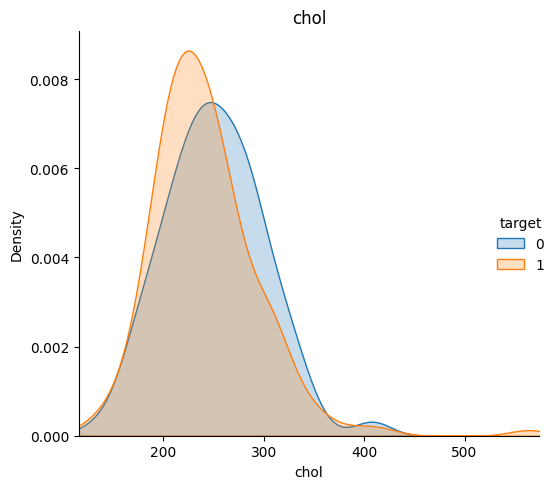

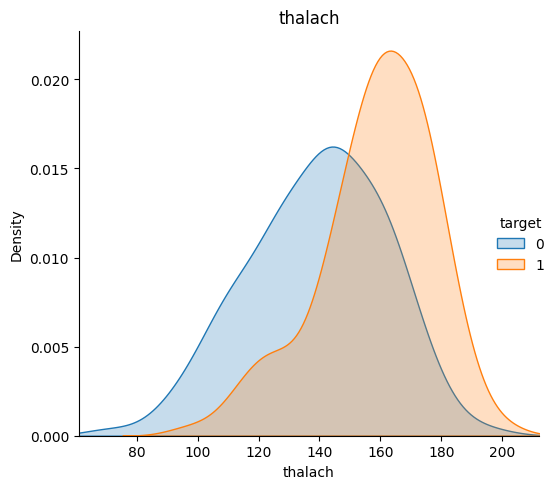

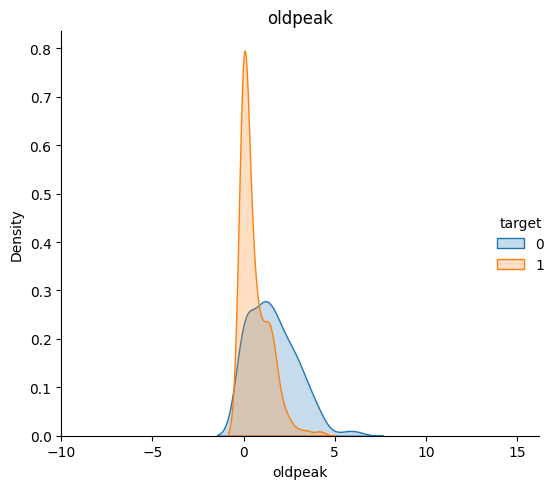

In [34]:
for i in numeric_var[0:len(numeric_var)-1]: 
    graphs=sns.FacetGrid(df[numeric_var],
                         hue="target",
                         height=5,
                         xlim=((df[i].min()-10,
                                df[i].max()+10)))
    graphs.map(sns.kdeplot,i,shade=True)
    graphs.add_legend()
    plt.title(i)
    plt.tight_layout()
    plt.show()

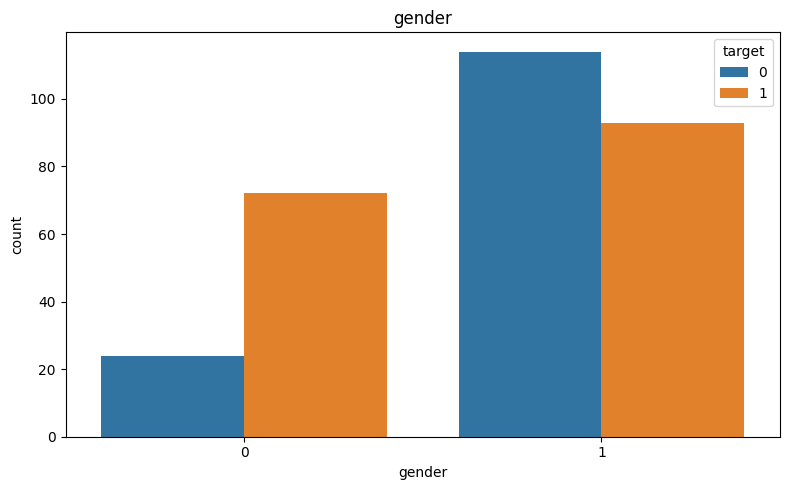

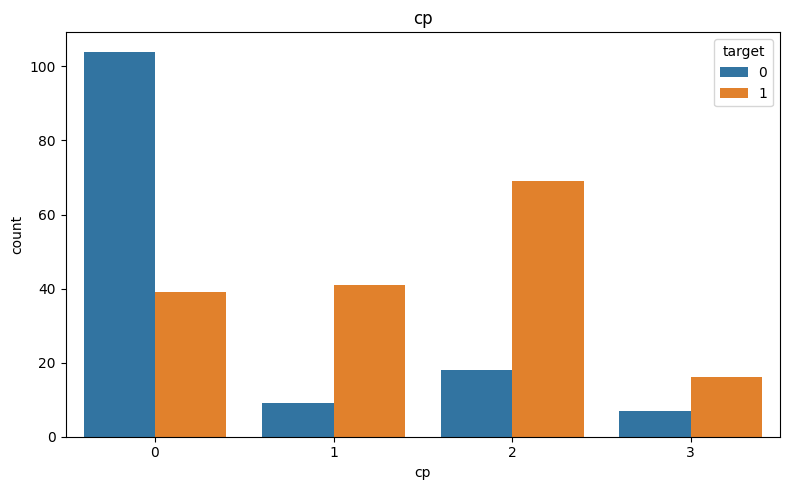

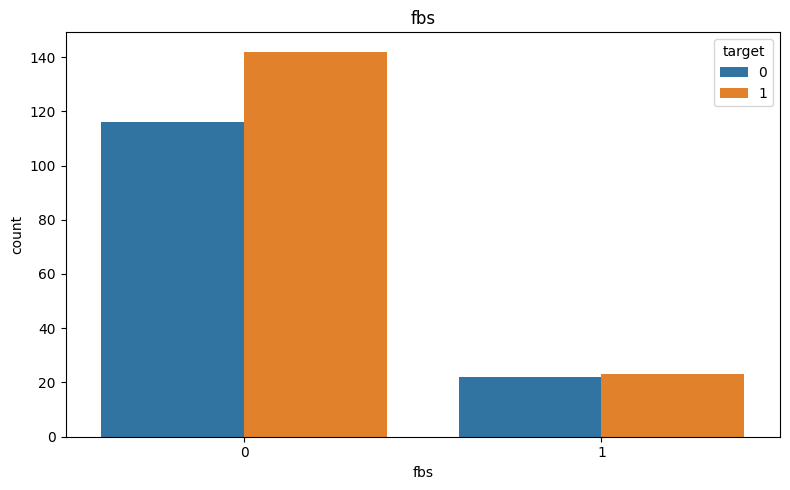

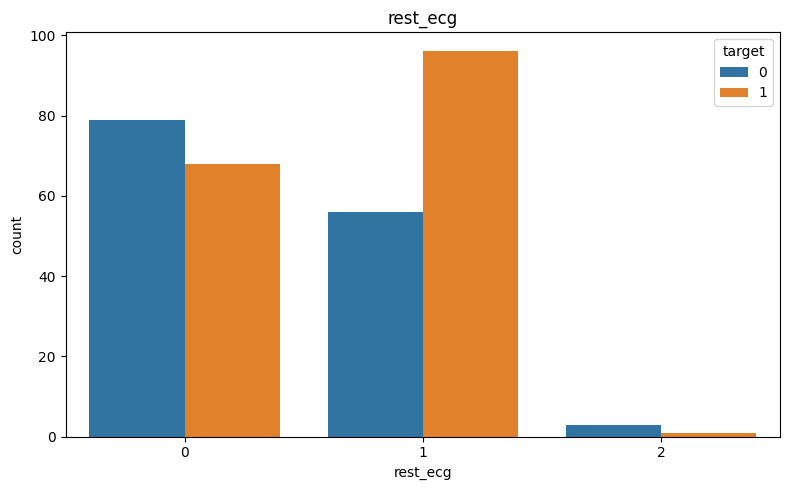

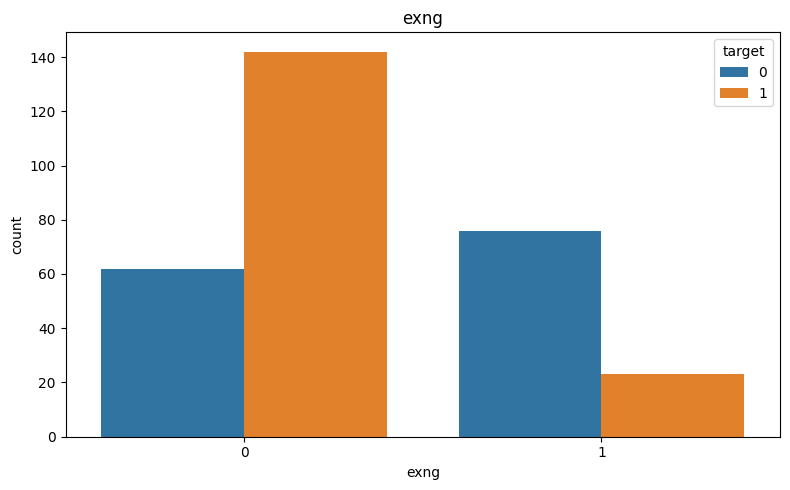

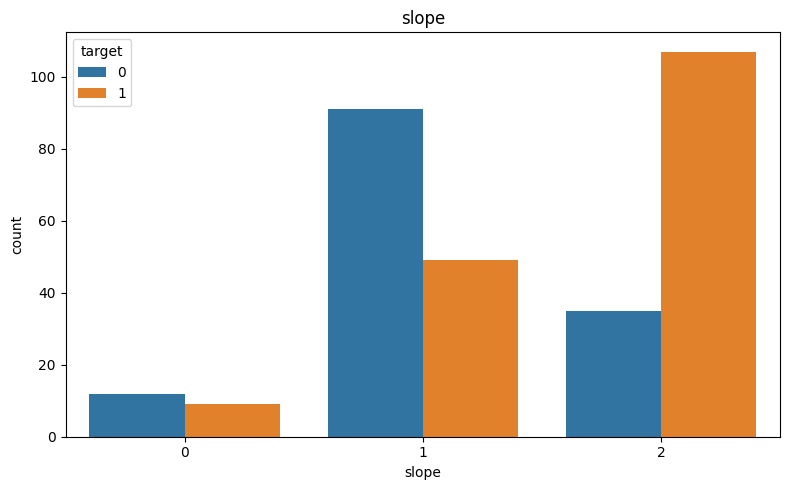

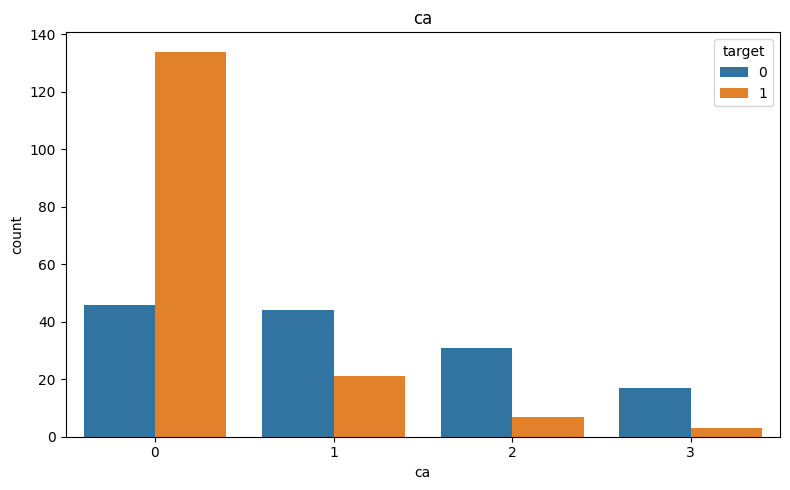

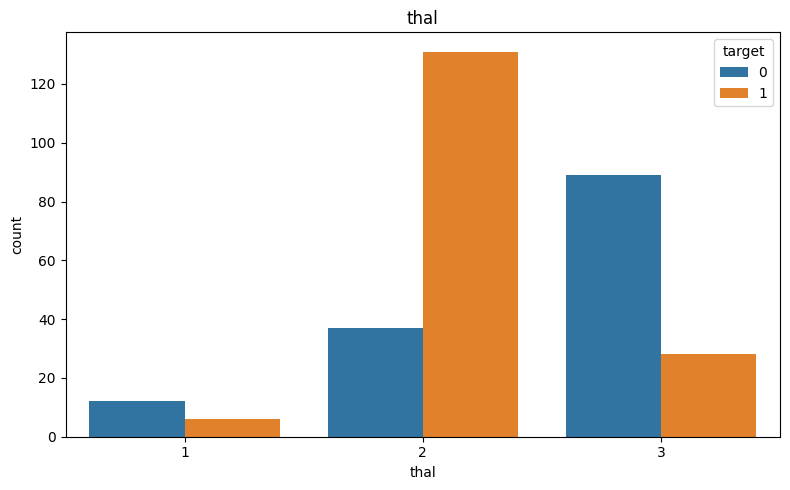

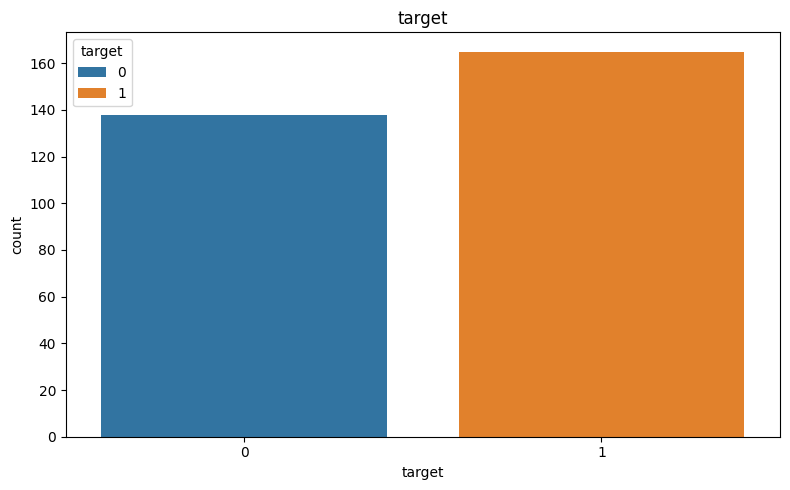

In [35]:
for i in categoric_var:
    plt.figure(figsize=(8,5))
    sns.countplot(x=i,data=df[categoric_var],hue="target")
    plt.title(i)
    plt.tight_layout()
    plt.show()

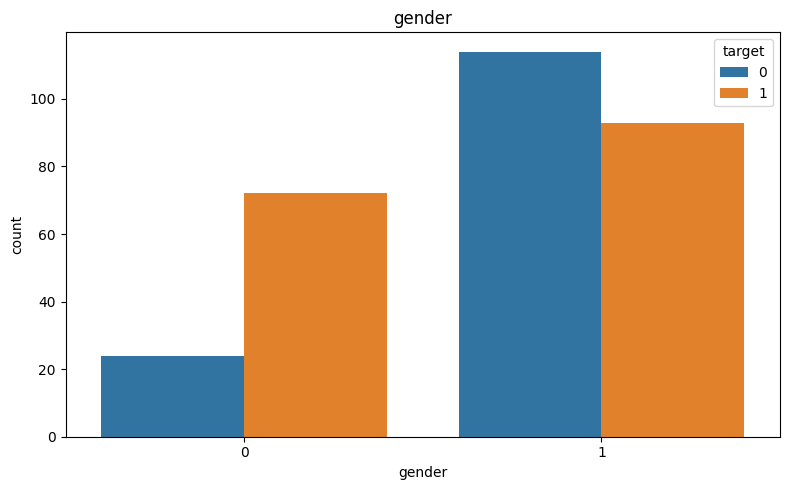

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x="gender",data=df[categoric_var],hue="target")
plt.title("gender")
plt.tight_layout()
plt.show()

In [37]:
numeric_var.remove("target")
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [38]:
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
scaled_data=robust_scaler.fit_transform(df[numeric_var])
scaled_data


array([[-0.44444444, -0.5       , -0.81889764, -0.43076923,  0.75      ],
       [-1.11111111,  1.1       , -0.26771654,  0.86153846, -0.5       ],
       [-0.2962963 , -1.5       , -0.28346457, -0.30769231,  0.25      ],
       ...,
       [-0.66666667, -1.25      , -0.56692913,  0.58461538, -0.5       ],
       [ 1.03703704,  0.5       , -0.01574803, -0.06153846,  0.625     ],
       [ 0.14814815,  1.        , -1.79527559,  0.61538462, -0.375     ]])

In [39]:
df_scaled=pd.DataFrame(scaled_data,columns=numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,-0.444444,-0.5,-0.818898,-0.430769,0.750
1,-1.111111,1.1,-0.267717,0.861538,-0.500
2,-0.296296,-1.5,-0.283465,-0.307692,0.250
3,-0.592593,-1.1,0.047244,-0.030769,-0.500
4,-0.666667,0.5,1.118110,-1.015385,0.625


In [40]:
df_new=pd.concat([df_scaled,df.loc[:,"target"]],axis=1)
df.head()

,age,gender,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
0,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
1,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
2,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
3,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
4,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0


In [41]:
melted_data=pd.melt(df_new,id_vars="target",
                   var_name="variables",
                   value_name="value")
melted_data

,target,variables,value
0,0,age,-0.444444
1,0,age,-1.111111
2,1,age,-0.296296
3,0,age,-0.592593
4,0,age,-0.666667
...,...,...,...
1510,1,oldpeak,0.000000
1511,1,oldpeak,-0.500000
1512,1,oldpeak,-0.500000
1513,1,oldpeak,0.625000


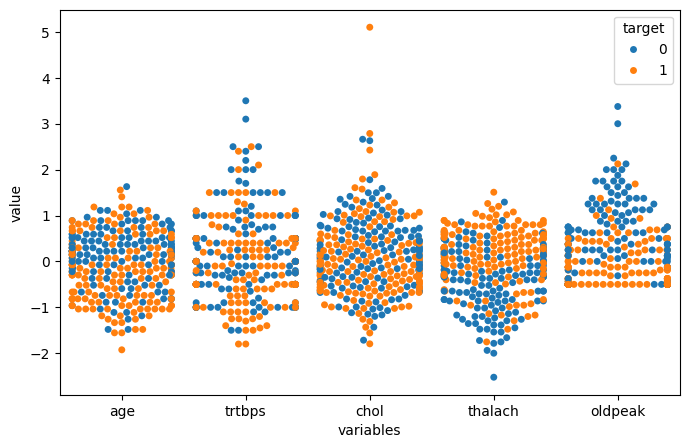

In [42]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="variables",
             y="value",
             hue="target",
             data=melted_data)
plt.show()

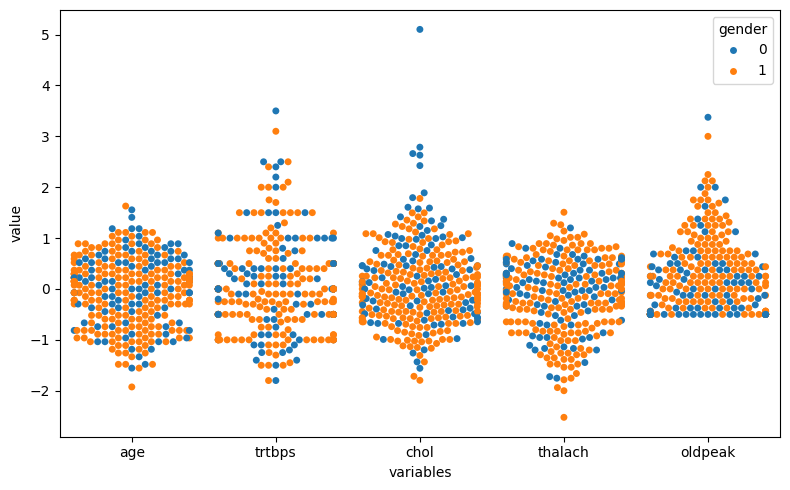

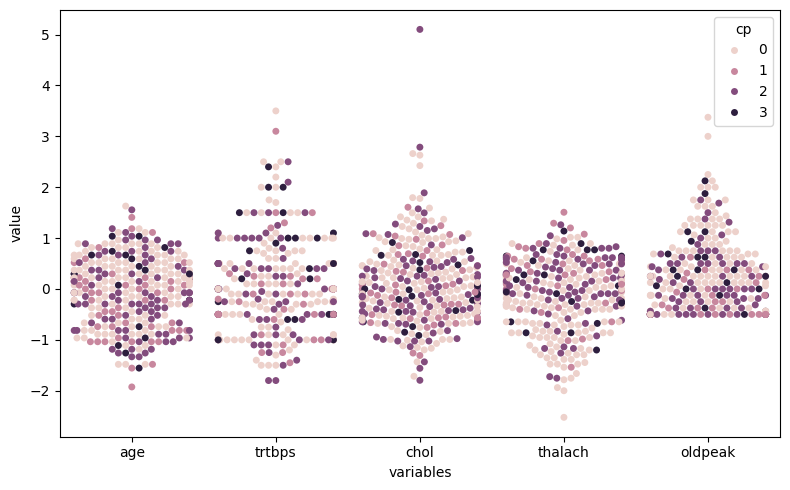

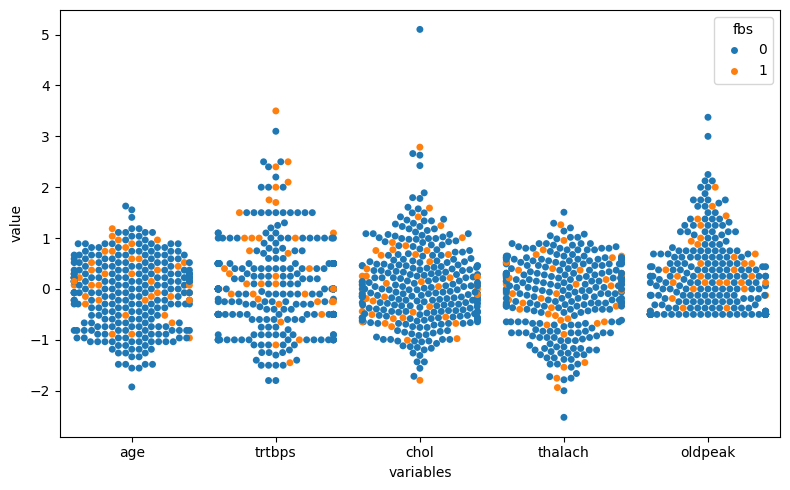

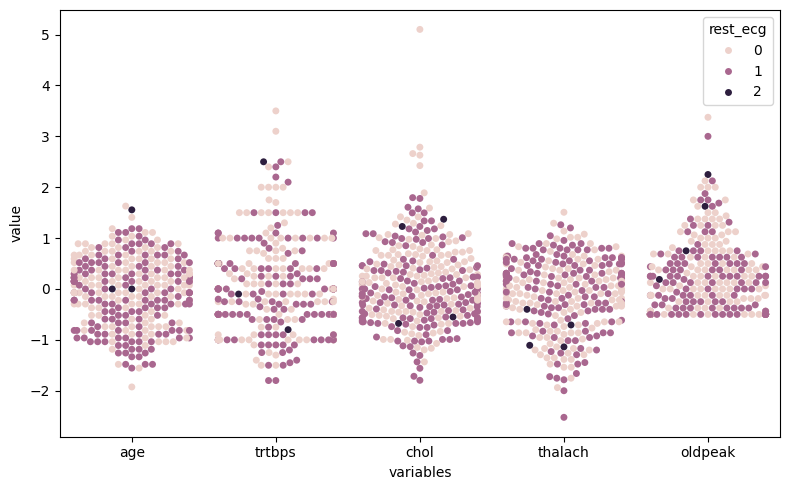

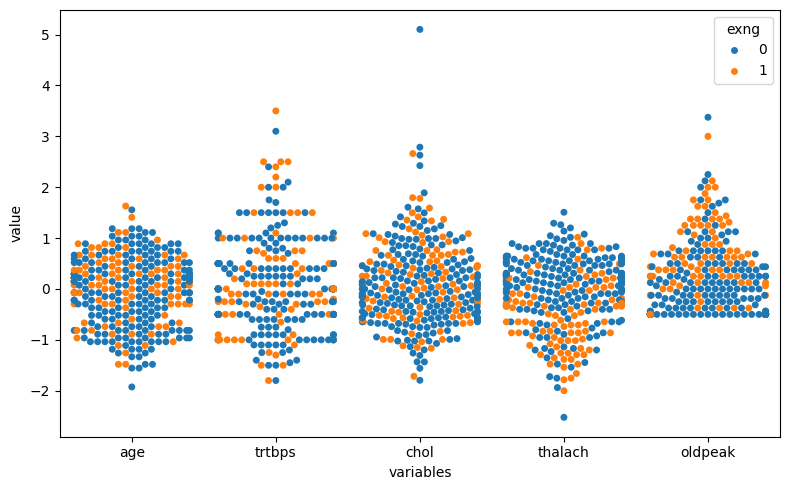

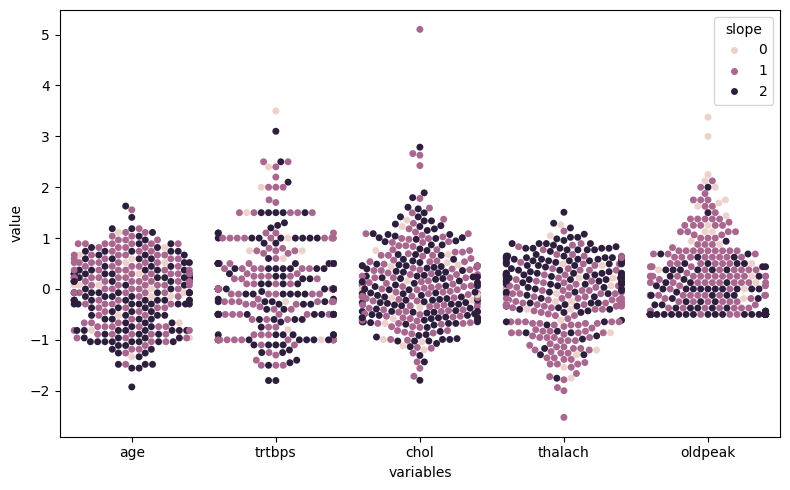

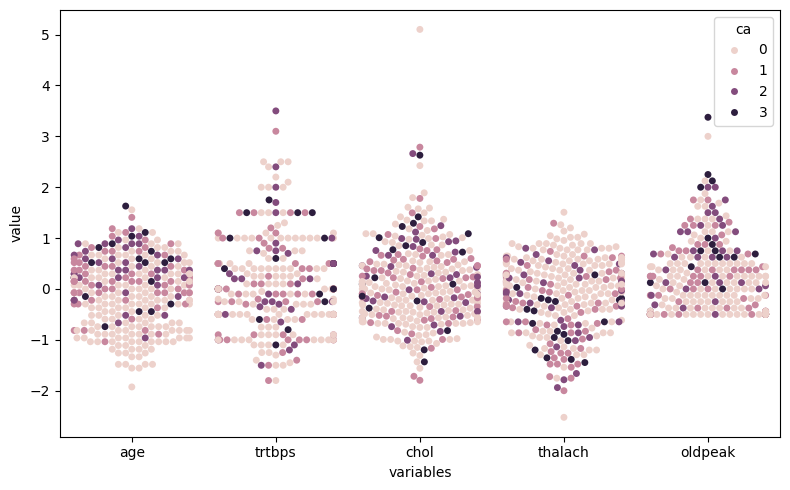

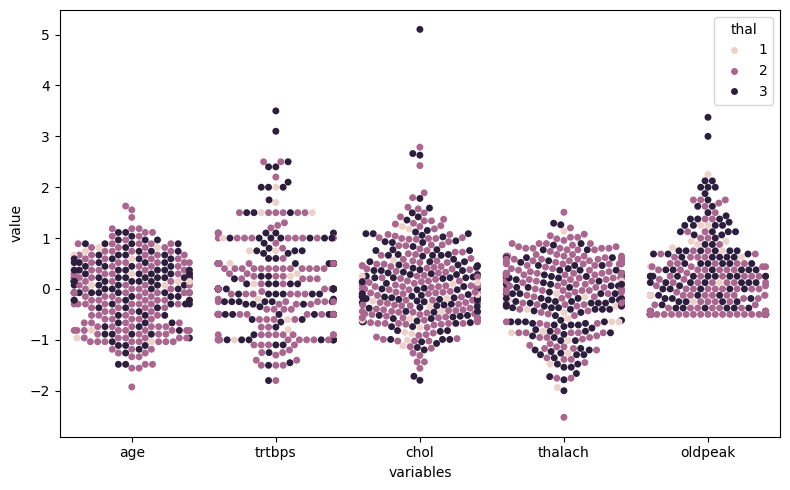

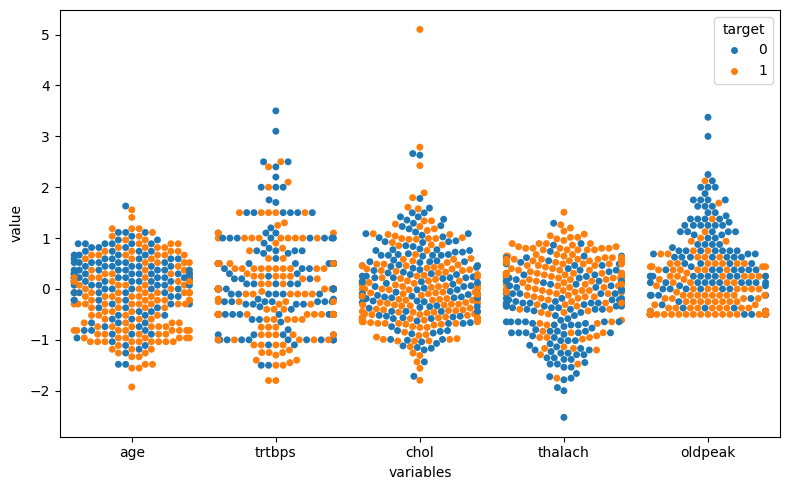

In [43]:
for i in df[categoric_var]:
    df_new=pd.concat([df_scaled,df.loc[:,i]],axis=1)
    melted_data=pd.melt(df_new,id_vars=i,
                   var_name="variables",
                   value_name="value")
    plt.figure(figsize=(8,5))
    sns.swarmplot(x="variables",
             y="value",
             hue=i,
             data=melted_data)
    plt.xlabel("variables")
    plt.ylabel("value")
    plt.tight_layout()
    plt.show()


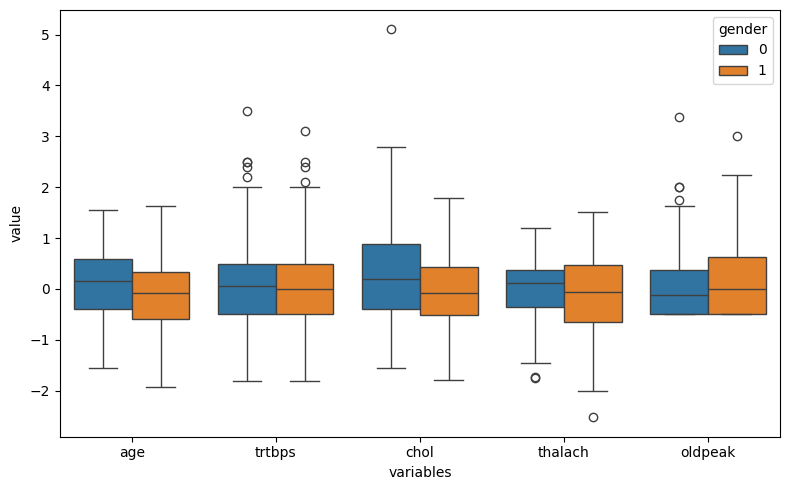

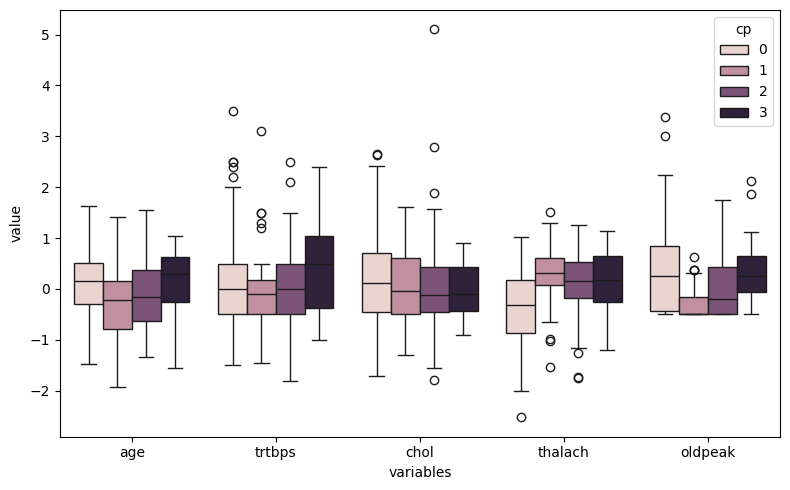

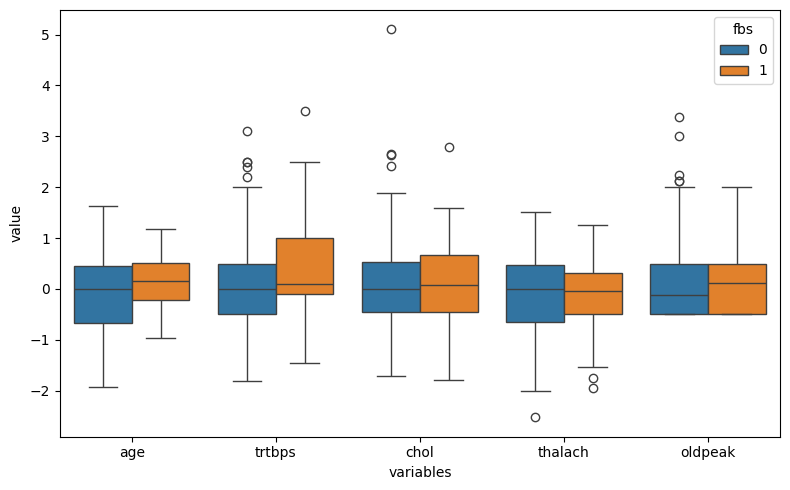

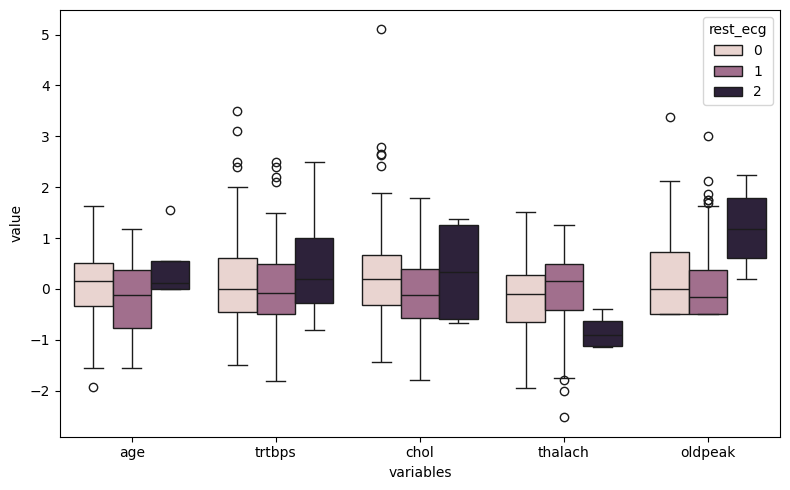

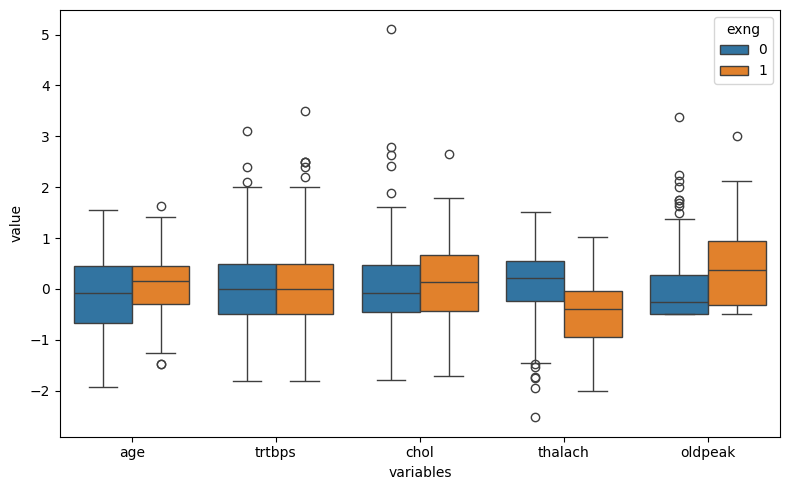

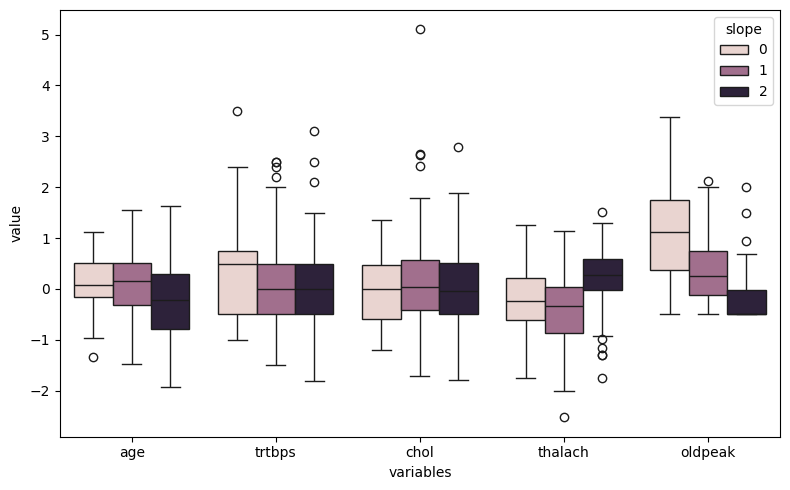

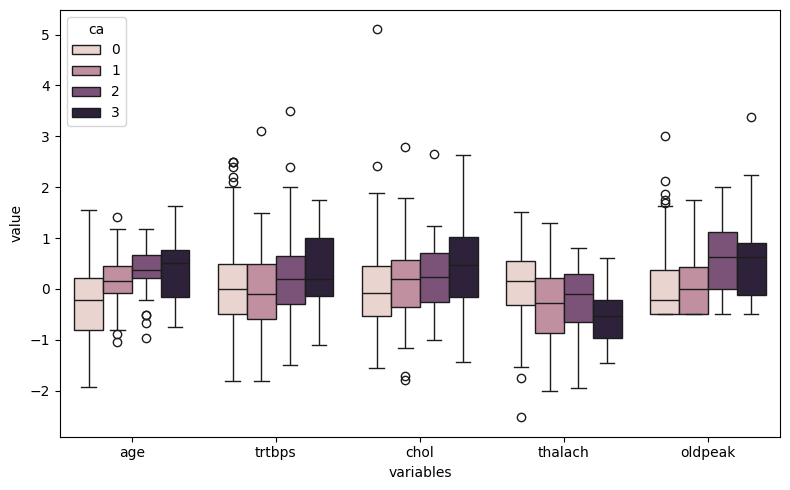

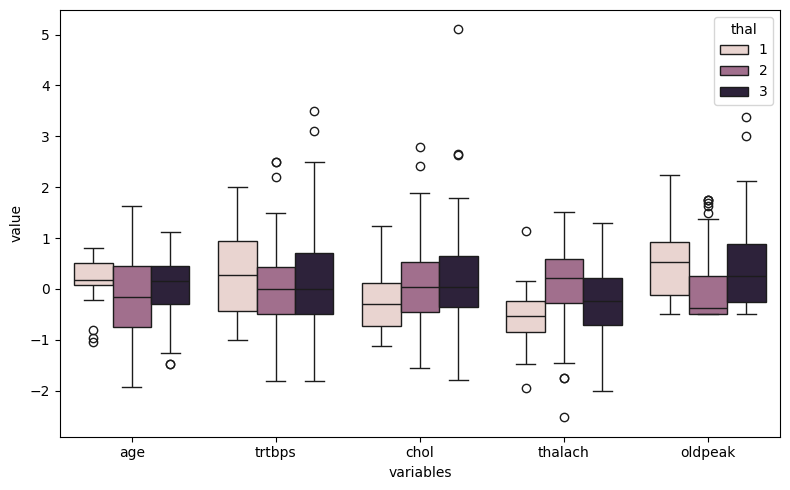

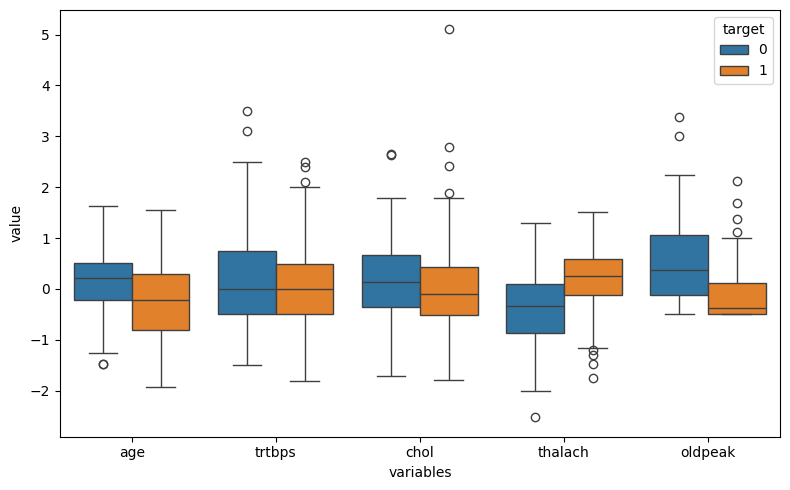

In [44]:
for i in df[categoric_var]:
    df_new=pd.concat([df_scaled,df.loc[:,i]],axis=1)
    melted_data=pd.melt(df_new,id_vars=i,
                   var_name="variables",
                   value_name="value")
    plt.figure(figsize=(8,5))
    sns.boxplot(x="variables",
             y="value",
             hue=i,
             data=melted_data)
    plt.xlabel("variables")
    plt.ylabel("value")
    plt.tight_layout()
    plt.show()

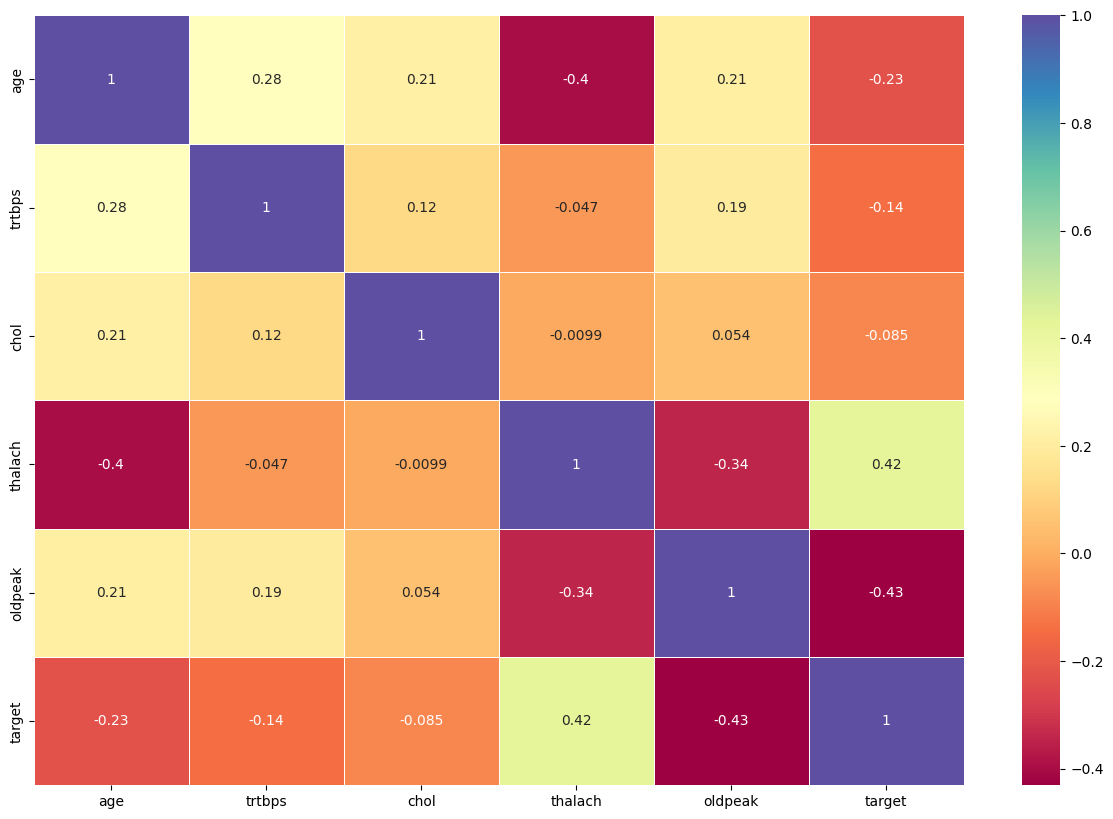

In [45]:
df_new2=pd.concat([df_scaled,df["target"]],axis=1) # target 0 1 
plt.figure(figsize=(15,10))
sns.heatmap(data=df_new2.corr(),
           cmap="Spectral",annot=True,linewidth=0.5)
plt.show()

In [46]:
df.drop(["chol"],axis=1,inplace=True)
df

,age,gender,cp,trtbps,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
0,49,1,2,120,0,1,139,0,2.0,1,3,3,0
1,40,1,0,152,0,1,181,0,0.0,2,0,3,0
2,51,1,2,100,0,1,143,1,1.2,1,0,2,1
3,47,1,2,108,0,1,152,0,0.0,2,0,2,0
4,46,1,0,140,0,1,120,1,1.8,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,56,1,1,120,0,1,178,0,0.8,2,0,2,1
299,41,0,1,126,0,1,163,0,0.0,2,0,2,1
300,46,0,1,105,0,1,172,0,0.0,2,0,2,1
301,69,0,3,140,0,1,151,0,1.8,2,2,2,1


In [47]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [48]:
numeric_var.remove("chol")
numeric_var

['age', 'trtbps', 'thalach', 'oldpeak']

In [49]:
# data preprocessing
# outliers ( الأعداد)

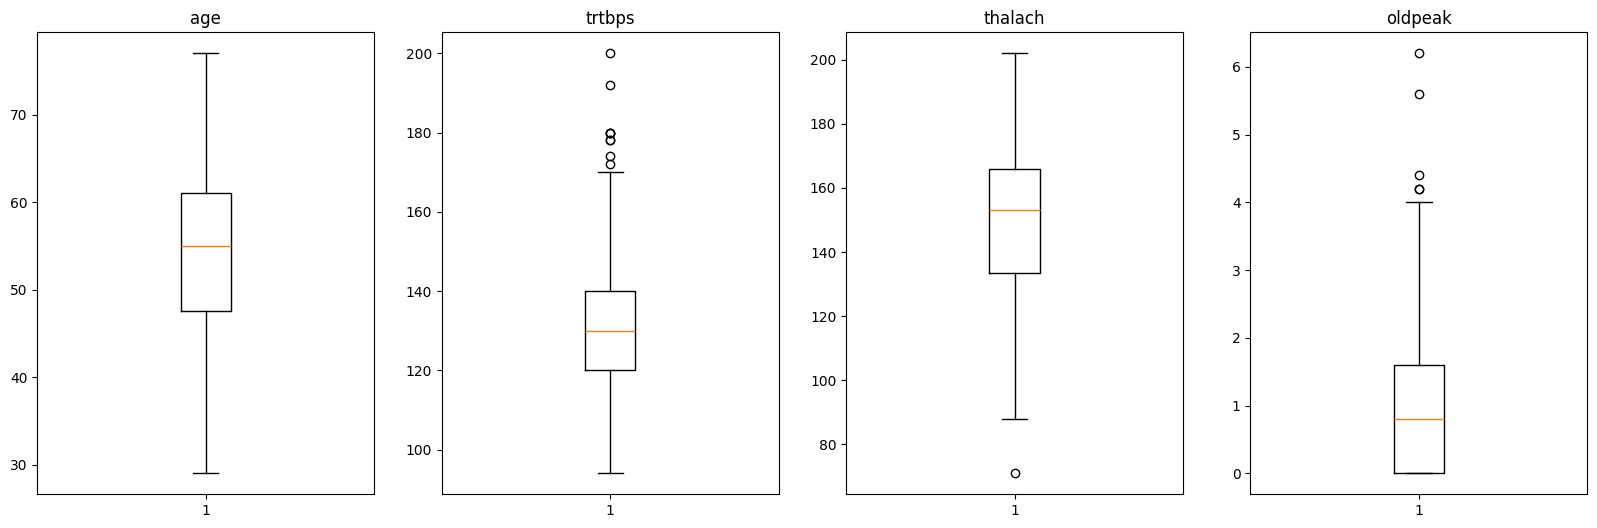

In [50]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,6))
# x,y=3,4
ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()


In [51]:
df[["age","trtbps","thalach","oldpeak"]].agg(["skew"]).transpose()

,skew
age,-0.202463
trtbps,0.713768
thalach,-0.537410
oldpeak,1.269720


In [52]:
# minnormal_value= q1-1.5*IQR
# IQR=Q3-Q1
#maxnormal_value=q3+1.5*IQR
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [53]:
iqr(df, "oldpeak") #call iqr

,age,gender,cp,trtbps,fbs,rest_ecg,thalach,exng,oldpeak,slope,ca,thal,target
13,62,0,0,160,0,0,145,0,6.2,0,3,3,0
129,58,1,0,114,0,2,140,0,4.4,0,3,1,0
144,59,1,3,178,0,0,145,0,4.2,0,0,3,1
191,55,1,0,140,0,1,111,1,5.6,0,0,3,0
264,51,1,0,140,0,1,122,1,4.2,1,3,3,0


In [54]:
min_outlier=iqr(df, "oldpeak").oldpeak.min()
min_outlier

4.2

In [55]:
max_normal_value=df[df["oldpeak"]<min_outlier].oldpeak.max()
max_normal_value

4.0

In [56]:
percentile_oldpeak=(stats.percentileofscore(df["oldpeak"],max_normal_value))/100
upper_limit=1-percentile_oldpeak

upper_limit

0.01980198019801971

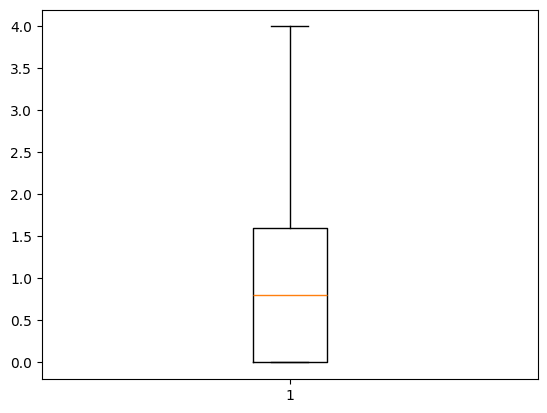

In [57]:
oldpeak_winsorize=winsorize(df.oldpeak,(0,upper_limit))

plt.boxplot(oldpeak_winsorize)
plt.show()

df["oldpeak_winsorize"]=oldpeak_winsorize

In [58]:
z_trtpbs=zscore(df["trtbps"])

for i in range(1,4):
     print(f"threshold {i}")
     print(f"outliers {len(np.where(z_trtpbs>i)[0])}")

threshold 1
outliers 51
threshold 2
outliers 13
threshold 3
outliers 2


In [59]:
min_outlier=df[z_trtpbs>2].trtbps.min()
min_outlier

170

In [60]:
max_outlier=df[df["trtbps"]<min_outlier].trtbps.max()
max_outlier

165

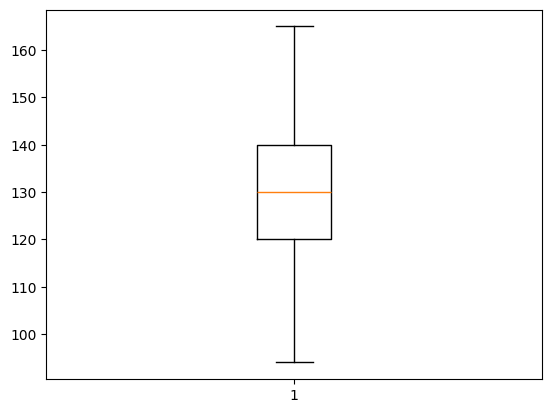

In [61]:
percentile_trtbps=(stats.percentileofscore(df["trtbps"],max_outlier))/100
upper_limit=1-percentile_trtbps

trtbps_winsorize=winsorize(df.trtbps,(0,upper_limit))

plt.boxplot(trtbps_winsorize)
plt.show()

df["trtbps_winsorize"]=trtbps_winsorize

In [62]:
df.drop(["trtbps","oldpeak"],axis=1,inplace=True)
df

,age,gender,cp,fbs,rest_ecg,thalach,exng,slope,ca,thal,target,oldpeak_winsorize,trtbps_winsorize
0,49,1,2,0,1,139,0,1,3,3,0,2.0,120
1,40,1,0,0,1,181,0,2,0,3,0,0.0,152
2,51,1,2,0,1,143,1,1,0,2,1,1.2,100
3,47,1,2,0,1,152,0,2,0,2,0,0.0,108
4,46,1,0,0,1,120,1,1,2,3,0,1.8,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,56,1,1,0,1,178,0,2,0,2,1,0.8,120
299,41,0,1,0,1,163,0,2,0,2,1,0.0,126
300,46,0,1,0,1,172,0,2,0,2,1,0.0,105
301,69,0,3,0,1,151,0,2,2,2,1,1.8,140


In [63]:
z_thalach=zscore(df["thalach"])

for i in range(1,4):
     print(f"threshold {i}")
     print(f"outliers {len(np.where(z_thalach>i)[0])}")

threshold 1
outliers 47
threshold 2
outliers 1
threshold 3
outliers 0


In [64]:
df[z_thalach>2][["thalach"]]

,thalach
225,202


In [65]:
#df.drop([33],axis=0,inplace=True)
#plt.boxplot(df["thalach"])
#plt.show()

In [66]:
iqr(df, "thalach")[["thalach"]]

,thalach
190,71


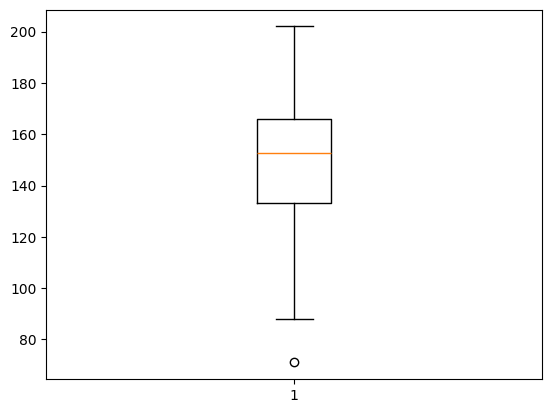

In [67]:
df.drop([80],axis=0,inplace=True)
plt.boxplot(df["thalach"])
plt.show()

In [68]:
df

,age,gender,cp,fbs,rest_ecg,thalach,exng,slope,ca,thal,target,oldpeak_winsorize,trtbps_winsorize
0,49,1,2,0,1,139,0,1,3,3,0,2.0,120
1,40,1,0,0,1,181,0,2,0,3,0,0.0,152
2,51,1,2,0,1,143,1,1,0,2,1,1.2,100
3,47,1,2,0,1,152,0,2,0,2,0,0.0,108
4,46,1,0,0,1,120,1,1,2,3,0,1.8,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,56,1,1,0,1,178,0,2,0,2,1,0.8,120
299,41,0,1,0,1,163,0,2,0,2,1,0.0,126
300,46,0,1,0,1,172,0,2,0,2,1,0.0,105
301,69,0,3,0,1,151,0,2,2,2,1,1.8,140


In [69]:
#transformation

In [70]:
df[["age","trtbps_winsorize","thalach","oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.197742
trtbps_winsorize,0.262513
thalach,-0.532143
oldpeak_winsorize,0.993897


In [71]:
df["oldpeak_winsorize_log"]=np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"]=np.sqrt(df["oldpeak_winsorize"])



In [72]:
df[["oldpeak_winsorize_log","oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.100101


In [73]:
df.drop(["oldpeak_winsorize_log","oldpeak_winsorize"],axis=1,inplace=True)
df

,age,gender,cp,fbs,rest_ecg,thalach,exng,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,49,1,2,0,1,139,0,1,3,3,0,120,1.414214
1,40,1,0,0,1,181,0,2,0,3,0,152,0.000000
2,51,1,2,0,1,143,1,1,0,2,1,100,1.095445
3,47,1,2,0,1,152,0,2,0,2,0,108,0.000000
4,46,1,0,0,1,120,1,1,2,3,0,140,1.341641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,56,1,1,0,1,178,0,2,0,2,1,120,0.894427
299,41,0,1,0,1,163,0,2,0,2,1,126,0.000000
300,46,0,1,0,1,172,0,2,0,2,1,105,0.000000
301,69,0,3,0,1,151,0,2,2,2,1,140,1.341641


In [74]:
# One hot encoding

In [75]:
df_copy=df.copy()
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)
pd.set_option('display.max_columns',None)
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,gender_1,cp_1,cp_2,cp_3,fbs_1,rest_ecg_1,rest_ecg_2,exng_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,49,139,0,120,1.414214,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True
1,40,181,0,152,0.000000,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True
2,51,143,1,100,1.095445,True,False,True,False,False,True,False,True,True,False,False,False,False,True,False
3,47,152,0,108,0.000000,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False
4,46,120,0,140,1.341641,True,False,False,False,False,True,False,True,True,False,False,True,False,False,True


In [76]:
# feature scaling

In [77]:
new_numeric_var=["age","thalach","trtbps_winsorize","oldpeak_winsorize_sqrt"]
robust_scaler=RobustScaler()
df_copy[new_numeric_var]=robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,gender_1,cp_1,cp_2,cp_3,fbs_1,rest_ecg_1,rest_ecg_2,exng_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,-0.436364,-0.412214,0,-0.5,0.410927,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True
1,-1.090909,0.870229,0,1.1,-0.707107,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True
2,-0.290909,-0.290076,1,-1.5,0.158919,True,False,True,False,False,True,False,True,True,False,False,False,False,True,False
3,-0.581818,-0.015267,0,-1.1,-0.707107,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False
4,-0.654545,-0.992366,0,0.5,0.353553,True,False,False,False,False,True,False,True,True,False,False,True,False,False,True


In [78]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split,StratifiedKFold
attributes=df_copy.drop(["target"],axis=1)
target=df_copy[["target"]]
attributes_train,attributes_test,target_train,target_test=train_test_split(attributes,
                                                                           target,test_size=0.1,
                                                                           random_state=3,
                                                                           stratify=target)
print(f"attributes_train={attributes_train.shape[0]}")
print(f"attributes_test={attributes_test.shape[0]}")
print(f"target_train={target_train.shape[0]}")
print(f"target_test={target_test.shape[0]}")

attributes_train=271
attributes_test=31
target_train=271
target_test=31


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

models={
    "Logistic Regression":LogisticRegression(random_state=5),
    "SVM": SVC(probability=True,random_state=5),
    "Decision Tree": DecisionTreeClassifier(random_state=5),
    "Random Forest": RandomForestClassifier(random_state=5)
}

In [80]:
def my_roc(classifier,name):
    from sklearn import metrics
    target_pred_proba = classifier.predict_proba(attributes_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(target_test, target_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()
    plt.plot([0, 1], [0, 1])
    plt.title(name)
    n = name + ".png"
    plt.savefig(n, dpi=300, bbox_inches='tight')


In [81]:
def calls_without_cross_validation():
    for model in models:# "Logistic Regression"
        classifier= models[model] # models["Logistic Regression"]
        # classifier= LogisticRegression(random_state=5)
        classifier.fit(attributes_train,target_train)
        target_predicted=classifier.predict(attributes_test)
        print(f"report for {classifier} \n {classification_report(target_test,target_predicted)}")
        print(f"confusion matrix for {classifier} \n {confusion_matrix(target_test,target_predicted)}")
        my_roc(classifier, f"{model}")

report for LogisticRegression(random_state=5) 
               precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.73      0.94      0.82        17

    accuracy                           0.77        31
   macro avg       0.81      0.76      0.76        31
weighted avg       0.80      0.77      0.76        31

confusion matrix for LogisticRegression(random_state=5) 
 [[ 8  6]
 [ 1 16]]
report for SVC(probability=True, random_state=5) 
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.76      0.94      0.84        17

    accuracy                           0.81        31
   macro avg       0.83      0.79      0.80        31
weighted avg       0.82      0.81      0.80        31

confusion matrix for SVC(probability=True, random_state=5) 
 [[ 9  5]
 [ 1 16]]
report for DecisionTreeClassifier(random_state=5) 
               precision    recall  f1-

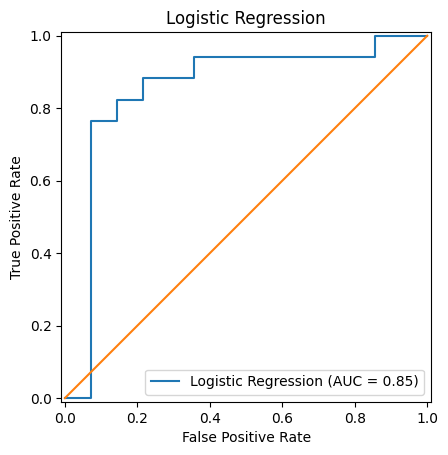

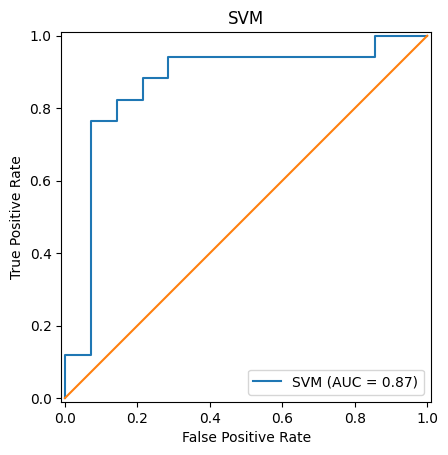

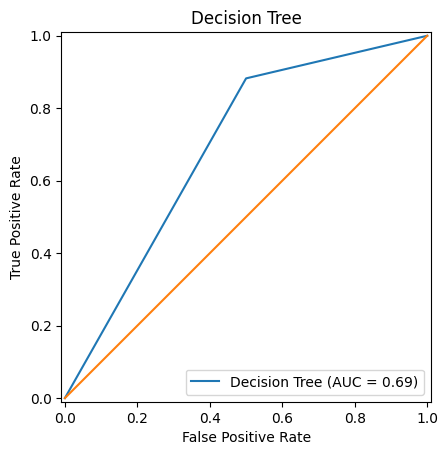

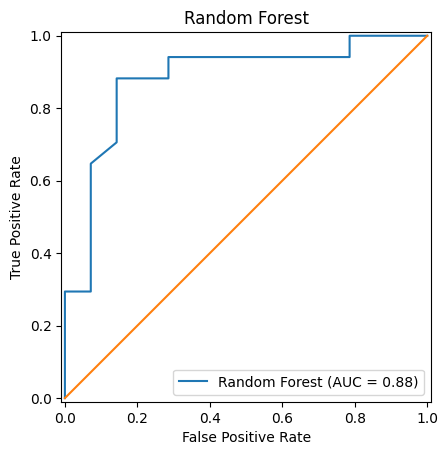

In [82]:
calls_without_cross_validation()

In [83]:

cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=5)

def calls_with_cross_validation():
    for model in models:
        classifier = models[model]
        scores=cross_val_score(classifier,attributes,target)
        print(f"the accuracy for {classifier}\n {scores.mean()}")

In [84]:
calls_with_cross_validation()

the accuracy for LogisticRegression(random_state=5)
 0.8575956284153005
the accuracy for SVC(probability=True, random_state=5)
 0.8277049180327868
the accuracy for DecisionTreeClassifier(random_state=5)
 0.7021311475409837
the accuracy for RandomForestClassifier(random_state=5)
 0.7945901639344262


In [85]:
from sklearn.model_selection import GridSearchCV
log_reg_new = LogisticRegression()
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)
log_reg_grid.fit(attributes_train, target_train)
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l2', 'solver': 'liblinear'}


In [86]:
log_reg_new2 = LogisticRegression(penalty = "l2", solver = "liblinear")
scores = cross_val_score(log_reg_new2, attributes, target, cv=cv)
print(f"Cross-Validation Accuracy Scores for {log_reg_new2}", scores.mean())

Cross-Validation Accuracy Scores for LogisticRegression(solver='liblinear') 0.8474193548387097
